# 0. Objective 

Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. 

The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in visibility in search results. 

This feature will help bring more attention to newer apps that have potential. 

The task is to understand what makes an app perform well - size? price? category? multiple factors together?

Analyze the data and present your insights in a format consumable by business – the ﬁnal output of the analysis would be presented to business as insights with supporting data/visualizations. 

# Loading The Data

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("playstore.csv")

print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(10841, 13)

In [ ]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [ ]:
data.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3791,AP Mobile - Breaking News,NEWS_AND_MAGAZINES,4.5,76677,4600.000000,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"May 25, 2017",4.4.3,4.0 and up
6082,Unseen - No Last Seen,TOOLS,4.4,103909,9200.000000,"5,000,000+",Free,0,Everyone,Tools,"May 11, 2018",2.2.7,4.3 and up
6460,Myjob@BM,SOCIAL,NaN,1,21516.529524,100+,Free,0,Teen,Social,"June 13, 2018",1.16.21,4.1 and up
5344,12 Step Meditations & Sober Prayers AA NA AL-ANON,LIFESTYLE,4.7,759,15000.000000,"50,000+",Free,0,Everyone 10+,Lifestyle,"January 22, 2018",1.4.5,4.1 and up
4547,Car Parking Nissan GT-R R35 Simulator,FAMILY,3.2,513,34000.000000,"100,000+",Free,0,Everyone,Simulation,"December 5, 2017",1.0,4.0 and up
3572,pCloud: Free Cloud Storage,PRODUCTIVITY,4.3,16149,21516.529524,"1,000,000+",Free,0,Everyone,Productivity,"July 24, 2018",Varies with device,Varies with device
8383,Sharaf DG,SHOPPING,4.0,7006,12000.000000,"500,000+",Free,0,Everyone,Shopping,"May 12, 2018",3.10,4.4 and up


# 1. Data clean up – Missing value treatment 

### 1.a.  Drop records where rating is missing since rating is our target/study variable 

In [ ]:
print(data["Rating"].shape)

(10841,)


In [ ]:
np.isnan(data["Rating"])

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

In [ ]:
data = data.dropna(subset=["Rating"])

In [ ]:
data.shape

(9367, 13)

### 1.b.  Check the null values for the Android Ver column. 

__i. Are all 3 records having the same problem?__

In [ ]:
data[pd.isnull(data["Android Ver"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


___ii. Drop the 3rd record i.e. record for “Life Made WIFI …” ___

In [ ]:
data.drop(data[data['App'] == "Life Made WI-Fi Touchscreen Photo Frame" ].index, inplace = True) 

In [ ]:
data[pd.isnull(data["Android Ver"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


__iii. Replace remaining missing values with the mode__

In [ ]:
data["Android Ver"].fillna(data["Android Ver"].mode())

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10834            4.1 and up
10836            4.1 and up
10837            4.1 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9366, dtype: object

In [ ]:
data.shape

(9366, 13)

#  2. Data clean up – correcting the data types

### 2.a. Which all variables need to be brought to numeric types?

__Ans.__ Fields such as price,installs and review needs to be converted to numeric type.

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 2.b. Price variable –remove $ sign and convert to float

In [ ]:
data['Price'] = data.Price.apply(lambda x: x.strip('$'))
data['Price'] = data[['Price']].astype(float)

data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 2.c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [ ]:
data['Installs'] = data.Installs.apply(lambda x: x.strip(','))
data['Installs'] = data.Installs.apply(lambda x: x.strip('+'))

data['Installs'] = data.Installs.apply(lambda x: x.replace(',',''))

data['Installs'] = data[['Installs']].astype(int)

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 2.d. Convert all other identified columns to numeric

In [ ]:
data['Rating'] = data[['Rating']].astype(float)
data['Reviews'] = data[['Reviews']].astype(int)
data['Size'] = data[['Size']].astype(int)

In [ ]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 3. Sanity checks – check for the following and handle accordingly

### 3.a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.          

__i. Are there any such records? Drop if so.__

In [ ]:
(data['Rating'] > 5).sum()

0

__Note:__ Since there are no such records that satisfies above condition, so we're not dropping any records further from Rating.

### 3.b. Reviews should not be more than installs as only those who installed can review the app.          

__i. Are there any such records? Drop if so.__

In [ ]:
(data['Reviews'] > data['Installs']).sum()

7

In [ ]:
data.drop(data[data['Reviews'] > data['Installs']].index, axis=0, inplace=True)

In [ ]:
(data['Reviews'] > data['Installs']).sum()

0

In [ ]:
data.shape #Checking the shape of data which ensures the records have dropped.

(9359, 13)

# 4. Identify and handle outliers –

### 4.a. Price column

__i. Make suitable plot to identify outliers in price__

In [ ]:
import seaborn as sns

sns.boxplot(x=data["Price"],data=data);

__ii. Do you expect apps on the play store to cost $200? Check out these cases__

__Ans.__ Yes,we can expect apps to cost $200.But, we drop such records here since it will not be useful for analysis here.

In [ ]:
data.drop(data[data['Price'] > 200].index, axis=0, inplace=True)

__iii. After dropping the useless records, make the suitable plot again to identify
outliers__

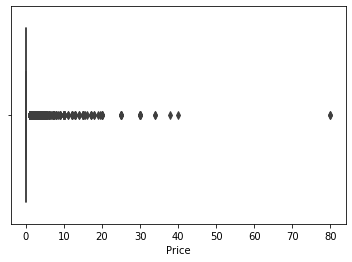

In [ ]:
sns.boxplot(x=data["Price"],data=data);

In [ ]:
data.shape

(9344, 13)

__iv. Limit data to records with price < $30__

In [ ]:
data.drop(data[data["Price"]> 30].index,axis=0,inplace=True)

In [ ]:
data.shape

(9338, 13)

### 4.b. Reviews column

__i. Make suitable plot__

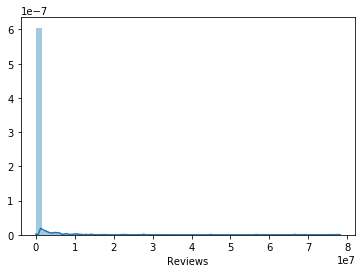

In [ ]:
sns.distplot(data["Reviews"]);

__ii. Limit data to apps with < 1 Million reviews__

In [ ]:
data.drop(data[data["Reviews"]>1000000].index,axis=0,inplace=True)

In [ ]:
data.shape

(8634, 13)

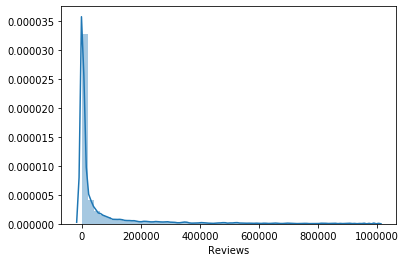

In [ ]:
sns.distplot(data["Reviews"]);

### 4.c. Installs

__i. What is the 95th percentile of the installs?__

In [ ]:
np.percentile(data["Installs"],95)

10000000.0

__ii. Drop records having a value more than the 95th percentile__

In [ ]:
data.drop(data[data["Installs"] > (np.percentile(data["Installs"],95)
                                                )].index,axis=0,inplace=True)

In [ ]:
data.shape

(8435, 13)

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

Skewness: -1.743427
Kurtosis: 5.153913


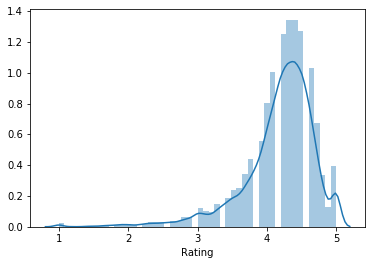

In [ ]:
sns.distplot(data["Rating"]);
print("Skewness: %f" %data["Rating"].skew())
print("Kurtosis: %f" %data["Rating"].kurt())

### 5.a. How do you explain this?

__Ans.__ After plotting the distribution of Ratings,it seems like most of the data lies in the range of 4 to 4.5.The skewness is in negative.

### 5.b. What is the implication of this on your analysis?

__Ans.__ Since the skewness is -1.74 the data is negatively skewed and kurtosis is 5.15 which means data is more towards the tail.

# 6.What are the top Content Rating values?


### 6.a. Are there any values with very few records?

In [ ]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

__Ans.__ Yes, records of Unrated and Adults only 18+ have very few records.

### 6.b. If yes, drop those as they won’t help in the analysis

In [ ]:
data.drop(data[data["Content Rating"] == "Unrated"].index,axis=0,inplace=True)

In [ ]:
data.drop(data[data["Content Rating"] == "Adults only 18+"].index,axis=0,inplace=True)

In [ ]:
data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

 # 7. Effect of size on rating

### 7.a. Make a joinplot to understand the effect of size on rating

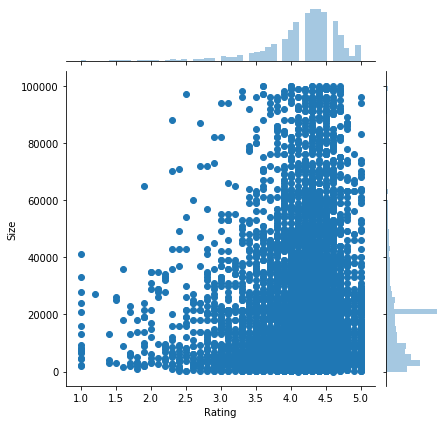

In [ ]:
sns.jointplot(x="Rating",y="Size",data=data);

### 7.b. Do you see any patterns?

__Ans.__ Yes,there is some correlation between Size and Rating.

### 7.c. How do you explain the pattern?

__Ans.__ Data is more populated towards higher Rating and in some cases increases with increase in Size.

# 8. Effect of price on rating

### 8.a. Make a jointplot (with regression line)

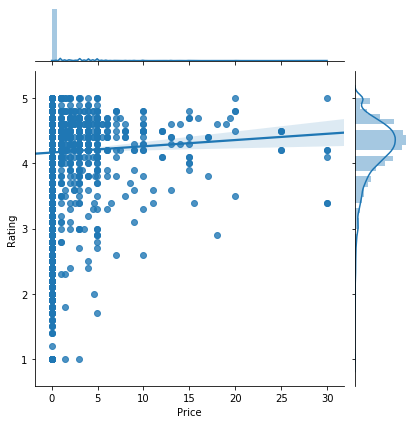

In [ ]:
sns.jointplot(x='Price',y='Rating',data=data,kind='reg');

### 8.b. What pattern do you see?

__Ans.__ The Rating remains in the range of 4.

### 8.c. How do you explain the pattern?

__Ans.__ There is positive correlation between Price and Rating.

### 8.d. Replot the data, this time with only records with price > 0

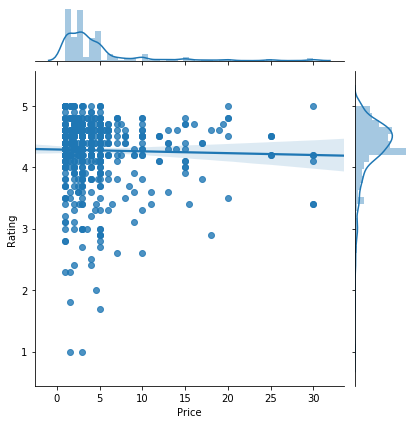

In [ ]:
price = data.loc[data.Price>0]

sns.jointplot(x='Price',y='Rating',data=price,kind='reg');

### 8.e. Does the pattern change?

__Ans.__ Yes,there is a slight change in the pattern.

### 8.f. What is your overall inference on the effect of price on the rating

__Ans.__ Data is weakly correlated.

# 9. Look at all the numeric interactions together 

### 9.a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

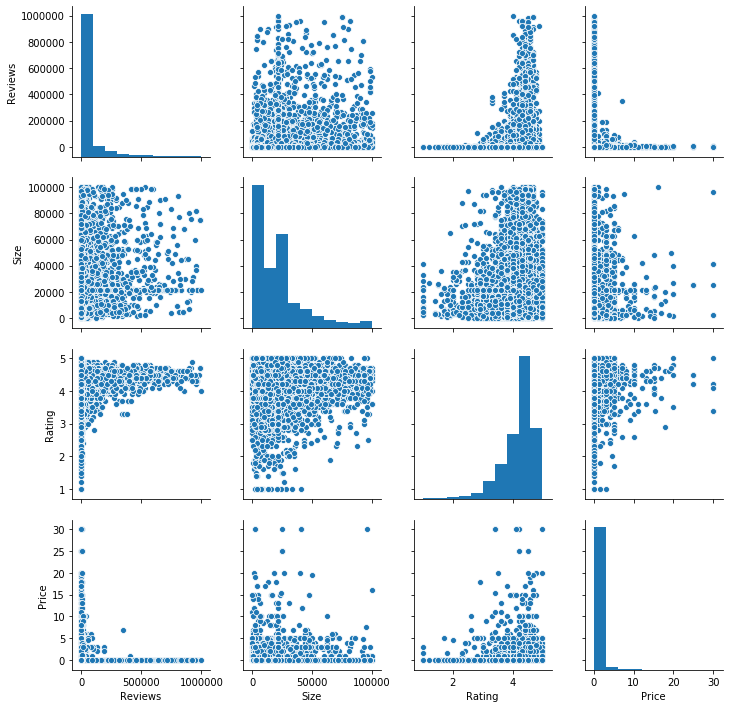

In [ ]:
sns.pairplot(data, x_vars=['Reviews','Size','Rating','Price'],y_vars=['Reviews','Size','Rating','Price']);

# 10. Rating vs. content rating

### 10.a. Make a bar plot displaying the rating for each content rating

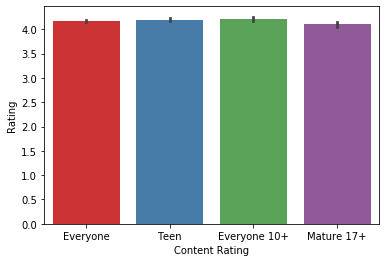

In [ ]:
sns.barplot(x='Content Rating',y='Rating',data=data,palette="Set1");

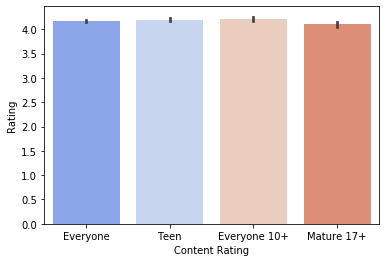

In [ ]:
sns.barplot(x='Content Rating',y='Rating',data=data,palette="coolwarm",estimator=np.mean);

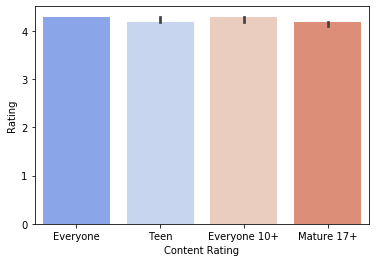

In [ ]:
sns.barplot(x='Content Rating',y='Rating',data=data,palette="coolwarm",estimator=np.median);

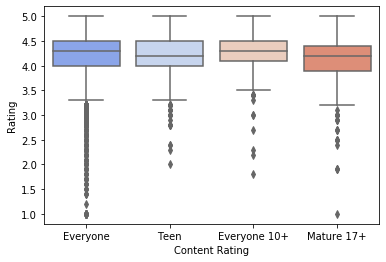

In [ ]:
sns.boxplot(x='Content Rating',y='Rating',data=data,palette="coolwarm");

### 10.b. Which metric would you use? Mean? Median? Some other quantile?

__Ans.__ Median since it is giving a better estimate.

### 10.c. Choose the right metric and plot

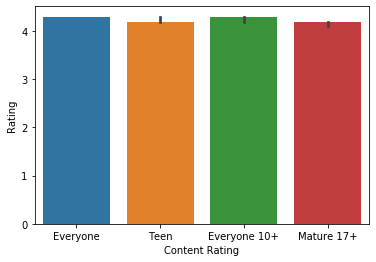

In [ ]:
sns.barplot(x='Content Rating',y='Rating',data=data,estimator=np.median);

#  11. Content rating vs. size vs. rating – 3 variables at a time

### 11.a. Create 5 buckets (20% records in each) based on Size.

In [ ]:
labeldata = ['0-20','20-40','40-60','60-80','80-100']
data['Bucket Size'] = pd.qcut(data['Size'],labels=labeldata,q=5)

In [ ]:
data['Bucket Size'].value_counts()

40-60     2310
20-40     1789
0-20      1713
80-100    1682
60-80      937
Name: Bucket Size, dtype: int64

In [ ]:
data.sample(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Bucket Size
901,Harkins Theatres,ENTERTAINMENT,4.3,1511,12000,100000,Free,0.0,Everyone,Entertainment,"June 11, 2018",2.1.1,4.1 and up,20-40
8552,DM HiDisk,TOOLS,2.8,54,20000,5000,Free,0.0,Everyone,Tools,"June 7, 2018",1.1.2,4.0.3 and up,40-60
5496,Undead Assault,GAME,4.3,4704,37000,100000,Free,0.0,Everyone 10+,Arcade,"November 4, 2015",1.4.6,2.3 and up,80-100
1768,Rolly Vortex,GAME,4.4,98123,40000,10000000,Free,0.0,Teen,Arcade,"May 25, 2018",1.7.0,4.1 and up,80-100
4149,Offroad Car G,FAMILY,4.3,64884,37000,5000000,Free,0.0,Everyone,Simulation,"July 12, 2016",1,2.3.3 and up,80-100
1506,Trulia Real Estate & Rentals,HOUSE_AND_HOME,4.5,175293,21516,10000000,Free,0.0,Everyone,House & Home,"July 24, 2018",Varies with device,Varies with device,40-60
7797,Chest Tracker for Clash Royale,TOOLS,4.3,77717,14000,5000000,Free,0.0,Everyone,Tools,"December 29, 2016",1.2.0,4.1 and up,40-60


### 11.b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [ ]:
ptable = pd.pivot_table(data,values='Rating',index='Bucket Size',columns='Content Rating',aggfunc=lambda x:np.quantile(x,0.2))
ptable

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20,3.8,3.84,3.28,3.84
20-40,3.8,3.94,3.64,3.80
40-60,4.0,4.10,3.70,3.90
60-80,3.8,4.00,3.90,4.00
80-100,3.9,4.00,4.00,4.00


### 11.c. Make a heatmap of this

__i. Annotated__

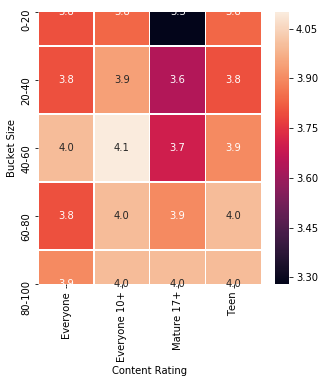

In [ ]:
import matplotlib .pyplot as plt
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(ptable,annot=True,fmt='.1f',linewidths='.3');

__ii. Greens color map__

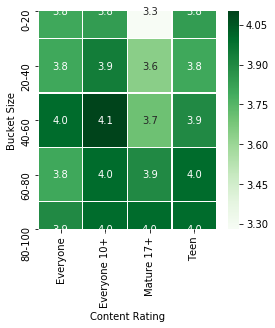

In [ ]:
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(ptable,annot=True,fmt='.1f',linewidths='.3',cmap='Greens');

### 11.d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

__Ans.__ The highest overall rating is 4.1, whereas the lowest is 3.3.
As the size increases, the rating also shows a slight increase.
The maximum ratings lies mostly in the greater size of the buckets.
Based on the heatmaps generated, it can be easily said that heavier apps have much better ratings than lighter apps.
Hence,Heavier apps are preferred in all categories.

__End of the Notebook.__